In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LogisticRegression

In [2]:
# Step 1: Load the dataset
data_file = r'E:\AAASchoolLearning\StudyResource\GraduateNTU\ProjectSum\DSThinkingProject\SVM\S1Data.csv'
data = pd.read_csv(data_file)

In [3]:
# Step 2: Separate features and target
X = data[['Ejection.Fraction', 'Creatinine']] # Features
y = data['Event']  # Target (Event column)
feature_names = X.columns

In [4]:
# Step 3: Initialize results dictionary for multiple runs
results = {'accuracy': [], 'f1_score': [], 'roc_auc': [], 'mcc': []}
feature_rankings = []

In [5]:
# Step 4: Run the experiment 100 times
for i in range(100):
    print(f'\nExperiment {i + 1}/100')
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Standardize the feature data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate the Logistic Regression model
    logreg_model = LogisticRegression(random_state=42, max_iter=10000, C=1, penalty='l2', solver='liblinear')
    logreg_model.fit(X_train, y_train)

    # Make predictions
    y_prob = logreg_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # Collect the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    results['accuracy'].append(accuracy)
    results['f1_score'].append(f1)
    results['roc_auc'].append(roc_auc)
    results['mcc'].append(mcc)

    # Step 5: Feature Ranking
    feature_importance = np.abs(logreg_model.coef_[0])
    feature_ranking = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
    feature_rankings.append([feature for feature, _ in feature_ranking])


Experiment 1/100

Experiment 2/100

Experiment 3/100

Experiment 4/100

Experiment 5/100

Experiment 6/100

Experiment 7/100

Experiment 8/100

Experiment 9/100

Experiment 10/100

Experiment 11/100

Experiment 12/100

Experiment 13/100

Experiment 14/100

Experiment 15/100

Experiment 16/100

Experiment 17/100

Experiment 18/100

Experiment 19/100

Experiment 20/100

Experiment 21/100

Experiment 22/100

Experiment 23/100

Experiment 24/100

Experiment 25/100

Experiment 26/100

Experiment 27/100

Experiment 28/100

Experiment 29/100

Experiment 30/100

Experiment 31/100

Experiment 32/100

Experiment 33/100

Experiment 34/100

Experiment 35/100

Experiment 36/100

Experiment 37/100

Experiment 38/100

Experiment 39/100

Experiment 40/100

Experiment 41/100

Experiment 42/100

Experiment 43/100

Experiment 44/100

Experiment 45/100

Experiment 46/100

Experiment 47/100

Experiment 48/100

Experiment 49/100

Experiment 50/100

Experiment 51/100

Experiment 52/100

Experiment 53/100

E

In [6]:
# Step 6: Calculate average feature ranking
feature_rank_count = defaultdict(int)
for ranking in feature_rankings:
    for rank, feature in enumerate(ranking):
        feature_rank_count[feature] += rank + 1

average_ranking = sorted(feature_rank_count.items(), key=lambda x: x[1] / len(feature_rankings))

print("\nAverage Feature Ranking:")
for rank, (feature, total_rank) in enumerate(average_ranking, start=1):
    print(f"{rank}. Feature: {feature}, Average Rank: {total_rank / len(feature_rankings):.2f}")


Average Feature Ranking:
1. Feature: Creatinine, Average Rank: 1.36
2. Feature: Ejection.Fraction, Average Rank: 1.64


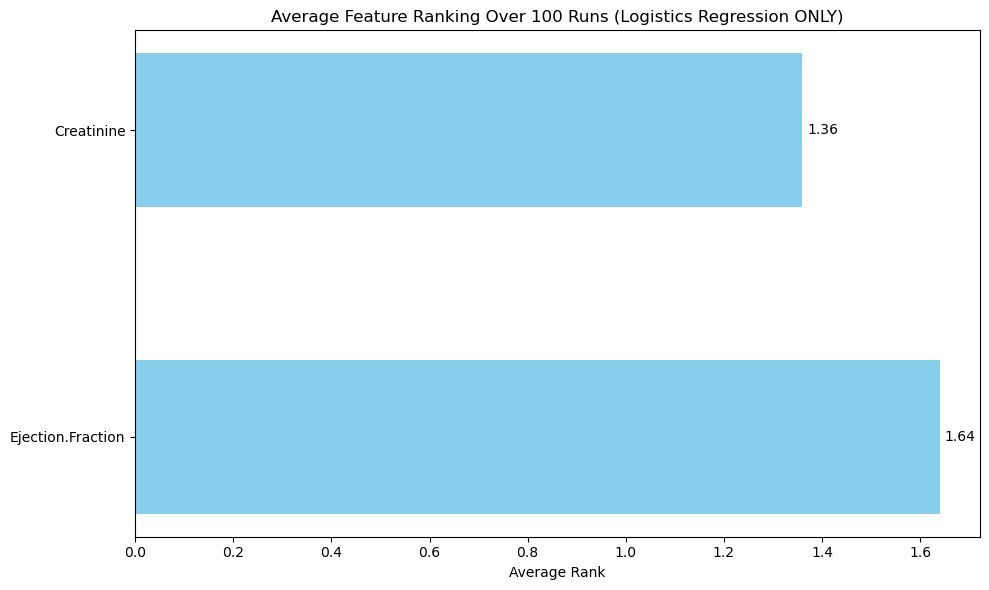

In [7]:
# Visualize the average feature ranking
features, avg_ranks = zip(*[(feature, total_rank / len(feature_rankings)) for feature, total_rank in average_ranking])
plt.figure(figsize=(10, 6))
plt.barh(features, avg_ranks, color='skyblue', height=0.5)
plt.xlabel('Average Rank')
plt.title('Average Feature Ranking Over 100 Runs (Logistics Regression) [ONLY]')
plt.gca().invert_yaxis()
for i, v in enumerate(avg_ranks):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center')
plt.tight_layout()
plt.show()

In [12]:
# Step 7: Aggregate the results
final_results = {
    'Accuracy': np.mean(results['accuracy']),
    'F1 score': np.mean(results['f1_score']),
    'ROC AUC': np.mean(results['roc_auc']),
    'MCC': np.mean(results['mcc'])
}

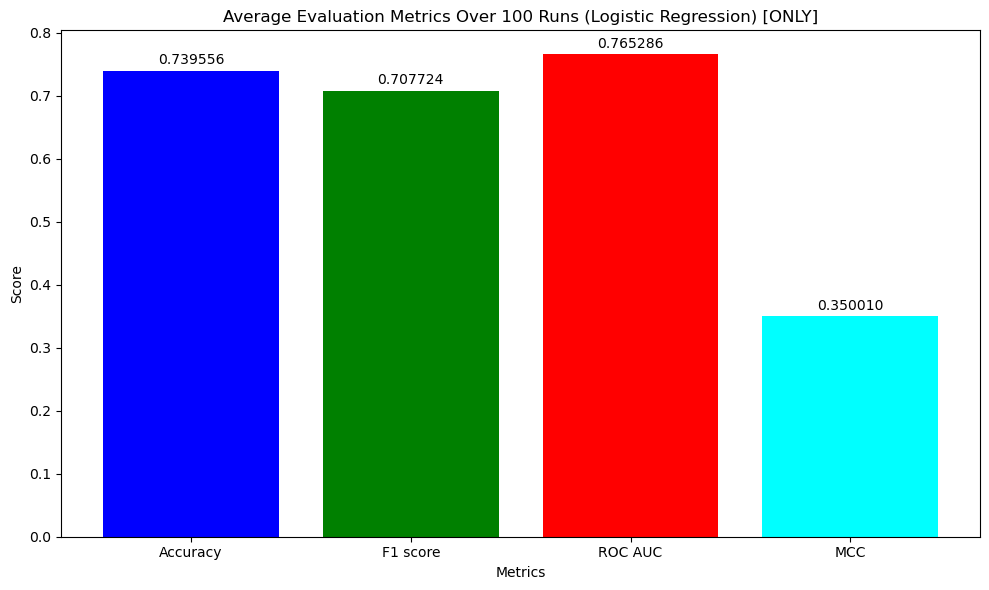

In [13]:
# Step 8: Visualize the results
metrics = ['Accuracy', 'F1 score', 'ROC AUC', 'MCC']
values = [final_results[metric] for metric in metrics]
colors = ['blue', 'green', 'red', 'cyan']


plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Average Evaluation Metrics Over 100 Runs (Logistic Regression) [ONLY]')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.6f}', ha='center')
plt.tight_layout()
plt.show()

In [20]:
# Save the final evaluation metrics to a text file
fem_file = r'E:\AAASchoolLearning\StudyResource\GraduateNTU\ProjectSum\DSThinkingProject\LogRegression_pre_after_ranking\LR_only_final_evaluation_metrics.txt'
with open(fem_file, 'w') as f:
    f.write(f"Accuracy: {final_results['accuracy']:.6f}\n")
    f.write(f"F1 Score: {final_results['f1_score']:.6f}\n")
    f.write(f"ROC AUC: {final_results['roc_auc']:.6f}\n")
    f.write(f"MCC: {final_results['mcc']:.6f}\n")